# K-Means Clustering Algorithm

Author: Jacob McCabe

## Overview

This notebook will take a look at the K-Means Clustering algorithm. The main ideas covered will include:

1. What is clustering?
2. The K-Means algorithm
3. Picking $k$


## What is clustering?

Clustering is a branch of unsupervised machine learning. The goal is to assign points to 'clusters' based on similarity. It's often used for exploratory data analysis when we want to learn something about the data. With clustering we can find a meaningful structure or organization in the data, discretize continuous values (vector quantization), and it can sometimes be used as a step in semi-supervised learning. 

## The algorithm

K-Means clustering groups data points into $k$ clusters, with the goal of minimizing the ***distortion***. Distortion is a measure of spread between the points of a cluster and uses the Euclidean distance. 
The initial conditions for the algorithm are the locations of the centroids, by randomizing them and using an iterative process we want to settle into a local minimum. Since this is a non-convex optimization problem, it can be good to run the algorithm several times with varying starting points and select the clustering that best minimizes distortion.. 

1. The set of centroids, $c_1, \ldots, c_k$ are initialized as random points in space.
2. Iterate until no points change groups or patience ran out.
    - Assign each point to the nearest centroid based on Euclidean distance.
    - Update each centroid to be the 'center' of each cluster (minimize distortion for each cluster).

A question that has probably gone through your head is "how do I pick the $k$?". After all, since this is unsupervised we have no idea how many clusters to look for. We can use the ***elbow method*** to do this. This requires us to run K-Means a number of times from $k=1...n$ where there are $n$ data points in the set. By plotting the minimum distortion against $k$ we will get a graph that looks something like exponential decay. At $k=1$, there will obviously be the maximum distortion since we are saying that every data point belongs to the same cluster, whereas at $k=n$ the distortion will go to zero since each point will be its own cluster. The best choice for $k$ is typically somewhere at the elbow in the graph. Yes, this is somewhat subjective and can be difficult to find. It is only meant to get a ballpark estimate of $k$. In the image below, we can see that there is an elbow around $k=3$, so this would be the value to use.

<img src="images/elbow_method.png" height="40%" width="40%">

## Resources

- [Image](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)    
- [scikit-learn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


## Example using `KMeans` from `scikit-learn`

#### Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

#### Loading Data

We will be using the Wine data available in `sklearn.datasets`. It has 178 wines with 13 continuous variables mapping to 3 classes. 

In [55]:
data = load_wine(as_frame=True)
features, target = data.data, data.target
features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Clustering with `Kmeans`

We want to make a pipeline that will use a `MaxAbsScaler` and `KMeans` to classify the data. Since we know that there are 3 classes of wine, we will use that for `n_clusters`. If we didn't know the number of classes, we could try out severl values of $k$ and use the elbow method to pick a good value. In order to replicate the results, we set the `random_state`.

In [56]:
kmeans_steps = [("scaler", MaxAbsScaler()), ("kmeans", KMeans(n_clusters=3, random_state=10))]
kmeans_pipe = Pipeline(kmeans_steps)
kmeans_pipe.fit(features)

C:\Users\jamcc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=10))])

#### Visualizing the model with `PCA`
Since there are 13 continuous variables, we aren't able to visualize the results of the clustering, but we can use `PCA` to reduce dimensionality to two dimenstions.

In [57]:
pca_steps = [("scaler", MaxAbsScaler()), ("pca", PCA())]
pca_pipe = Pipeline(pca_steps)
score = pca_pipe.fit_transform(features)
round(sum(pca_pipe["pca"].explained_variance_ratio_[:2]), 3)

0.618

It seems to struggle with the boundary between the red and blue classes, but we can see that our `KMeans` model did a decent job overall. 

Text(0, 0.5, 'Component 2')

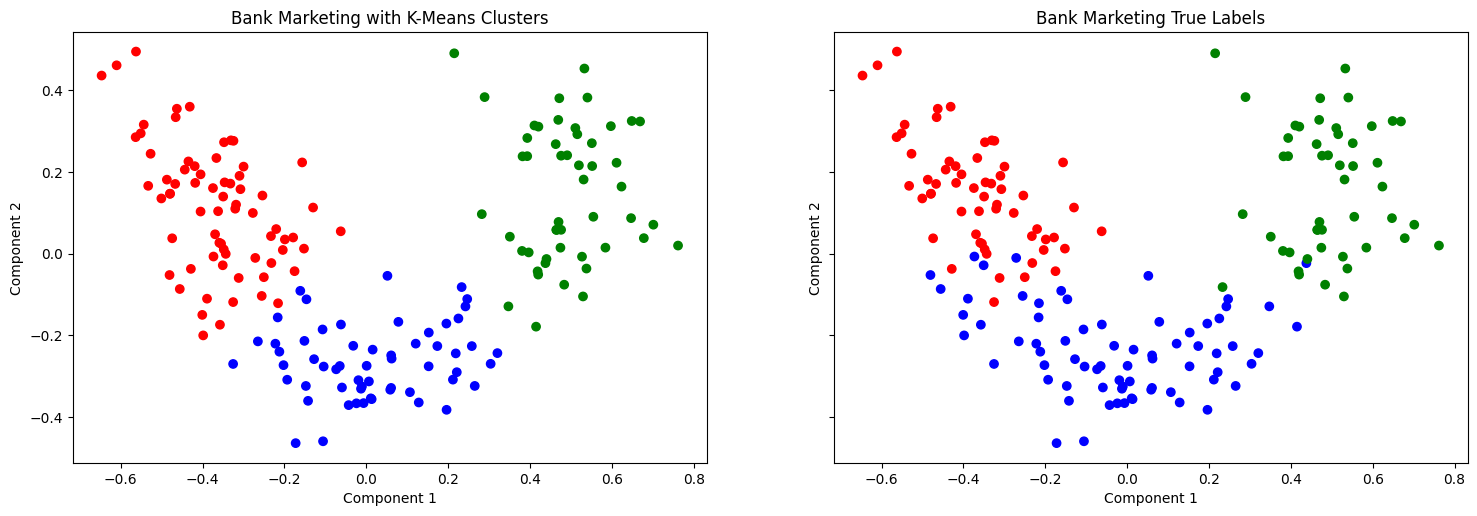

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,18), sharey=True)
ax1.scatter(score[:,0], score[:,1], c=pd.Series(kmeans_pipe.predict(features)).map({0:"red", 1:"blue", 2:"green"}))
ax2.scatter(score[:,0], score[:,1], c=target.map({0:"red", 1:"blue", 2:"green"}))

ax1.set_aspect("equal")
ax1.set_title("Bank Marketing with K-Means Clusters")
ax1.set_xlabel("Component 1")
ax1.set_ylabel("Component 2")
ax2.set_aspect("equal")
ax2.set_title("Bank Marketing True Labels")
ax2.set_xlabel("Component 1")
ax2.set_ylabel("Component 2")